#### Packages

In [1]:
import torch
import matplotlib.pyplot as plt
from scipy.stats import linregress

#### Some basic selections

In [2]:
mean_dist_fp = '../../data/mean_dists_experimental.pt'
mean_sq_dist_fp='../../data/squares_experimental.pt'

save_dist_fp = '../../data/mean_dists.pt'
save_dist_sq_fp ='../../data/squares.pt'

In [3]:
extrapolate_to = 256 # Maximum separation to extrapolate to

#### Load and visualize the existing vectors

In [4]:
mean_dist = torch.load(mean_dist_fp)
mean_sq_dist = torch.load(mean_sq_dist_fp)

We didn't save mean/mean_sq data for sep 0 since it's always 0, so the index is 1 behind separation

In [5]:
separation = torch.arange(1,len(mean_dist)+1)

##### Mean values

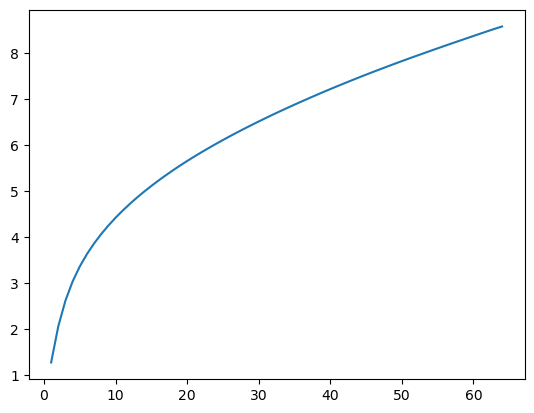

In [6]:
plt.plot(separation,mean_dist)

The relationship is log-log for long distances

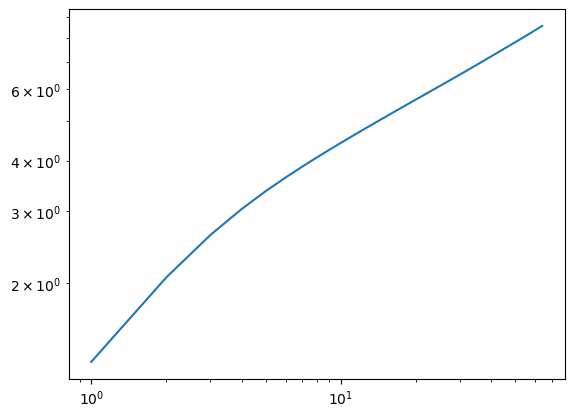

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(separation,mean_dist)
ax.set_xscale('log')
ax.set_yscale('log')

Visualize the longer distances more explicitly

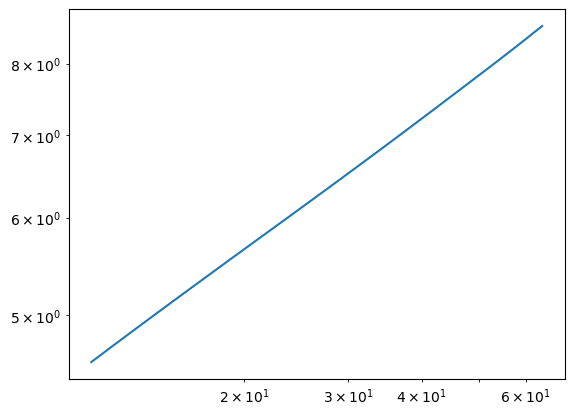

In [8]:
n_skip = 10

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(separation[n_skip:],mean_dist[n_skip:])
ax.set_xscale('log')
ax.set_yscale('log')

##### Do the same for mean-square distances

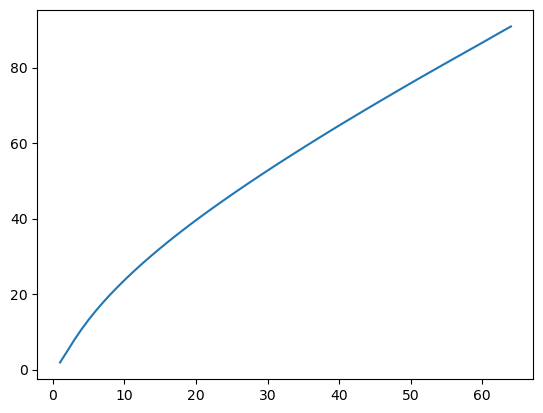

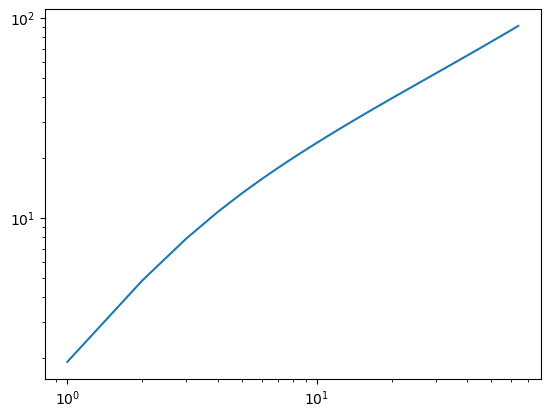

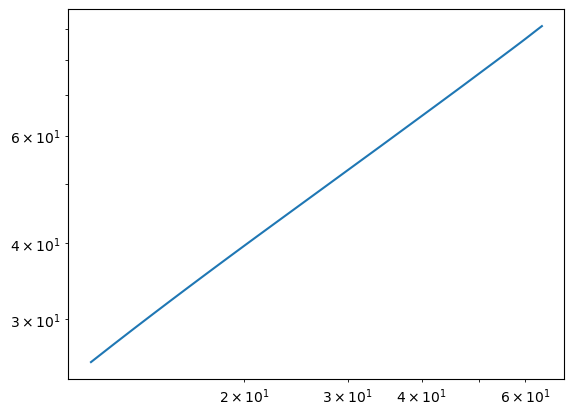

In [9]:
plt.plot(separation,mean_sq_dist)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(separation,mean_sq_dist)
ax.set_xscale('log')
ax.set_yscale('log')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(separation[n_skip:],mean_sq_dist[n_skip:])
ax.set_xscale('log')
ax.set_yscale('log')

#### Get best-fit lines for extrapolation

In [10]:
def best_fit_log_log(x,y,n_skip=n_skip):

    x = x[n_skip:].log10().numpy()
    y = y[n_skip:].log10().numpy()

    result = linregress(x,y)
    m = result.slope
    b = result.intercept
    r_val = result.rvalue
    p_val = result.pvalue
    
    return m,b,r_val,p_val

In [11]:
extrap = lambda m,x,b: 10**(m*x.log10() + b)

##### Mean distances

In [12]:
m,b,r_val,p_val = best_fit_log_log(separation,mean_dist)
print(f'R value: {r_val}')
print(f'P value: {p_val}')

R value: 0.9999449299964661
P value: 1.3556115978571286e-104


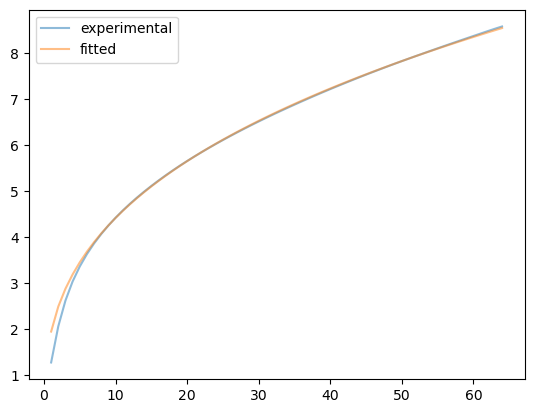

In [13]:
plt.plot(separation,mean_dist,label='experimental',alpha=.5)

y2 = extrap(m,separation,b)
plt.plot(separation,y2,label='fitted',alpha=.5)
plt.legend()

##### Mean-square distances

In [14]:
m1,b1,r_val,p_val = best_fit_log_log(separation,mean_sq_dist)
print(f'R value: {r_val}')
print(f'P value: {p_val}')

R value: 0.999980963332341
P value: 1.3737100155064715e-116


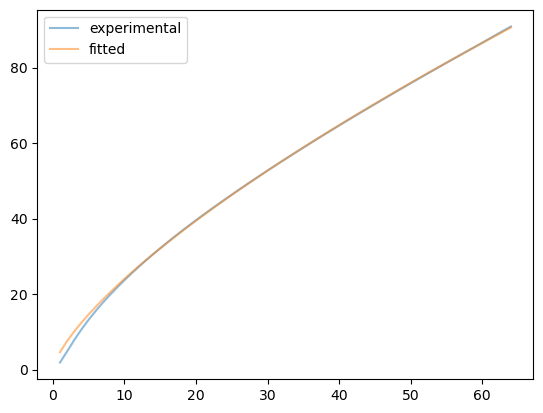

In [15]:
plt.plot(separation,mean_sq_dist,label='experimental',alpha=.5)

y2 = extrap(m1,separation,b1)
plt.plot(separation,y2,label='fitted',alpha=.5)
plt.legend()

##### Extrapolate the statistics

In [16]:
min_separation = len(mean_dist)+1 # +1 because (index+1) == separation, so the last entry in mean_dist corresponds to separation len(mean_dist)
long_sep = torch.arange(min_separation,extrapolate_to+1)

In [17]:
mean_dist_extrap = torch.cat((mean_dist,extrap(m,long_sep,b)))
mean_sq_dist_extrap = torch.cat((mean_sq_dist,extrap(m1,long_sep,b1)))

##### Plot for sanity

In [18]:
x2 = torch.arange(1,extrapolate_to+1)

Text(0.5, 1.0, 'Mean Distances')

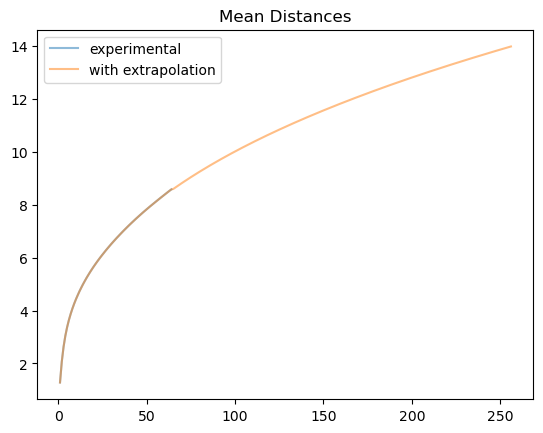

In [19]:
plt.plot(separation,mean_dist,label='experimental',alpha=.5)
plt.plot(x2,mean_dist_extrap,label='with extrapolation',alpha=.5)
plt.legend()
plt.title('Mean Distances')

Text(0.5, 1.0, 'Mean-Square Distances')

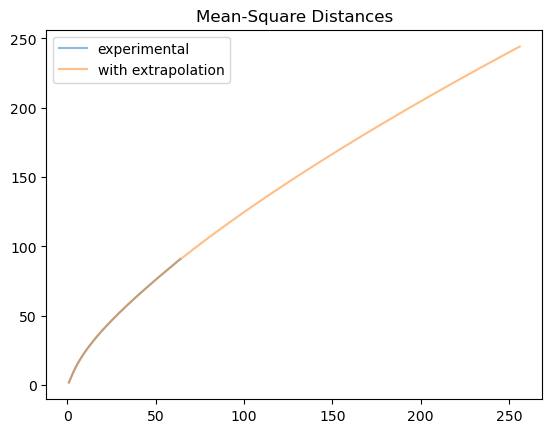

In [20]:
plt.plot(separation,mean_sq_dist,label='experimental',alpha=.5)
plt.plot(x2,mean_sq_dist_extrap,label='with extrapolation',alpha=.5)
plt.legend()
plt.title('Mean-Square Distances')

##### Save the files

In [21]:
torch.save(mean_dist_extrap,save_dist_fp)
torch.save(mean_sq_dist_extrap,save_dist_sq_fp)